In [1]:
!pip install Biopython
!pip install seaborn
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.3 MB/s eta 0:00:00


In [2]:
!pip install dna_features_viewer

In [ ]:
from Bio import SeqIO

def filter_fasta_length(input_fasta, output_fasta, min_length=1300, max_length=1500):
    """
    Filtra secuencias en un archivo FASTA por longitud y genera un nuevo archivo FASTA.

    :param input_fasta: Ruta al archivo FASTA de entrada.
    :param output_fasta: Ruta al archivo FASTA de salida.
    :param min_length: Longitud mínima de secuencia.
    :param max_length: Longitud máxima de secuencia.
    """
    filtered_records = []
    for record in SeqIO.parse(input_fasta, "fasta"):
        if min_length <= len(record.seq) <= max_length:
            filtered_records.append(record)

    # Guardar las secuencias filtradas en un nuevo archivo FASTA
    with open(output_fasta, "w") as output_file:
        SeqIO.write(filtered_records, output_file, "fasta")

    print(f"Se guardaron {len(filtered_records)} secuencias en '{output_fasta}'.")

# Ejemplo de uso
filter_fasta_length("/content/Bacterias - Ribosomal rRNA 16S.fasta", "/content/Bacterias - Ribosomal rRNA 16S_filtered_output.fasta")

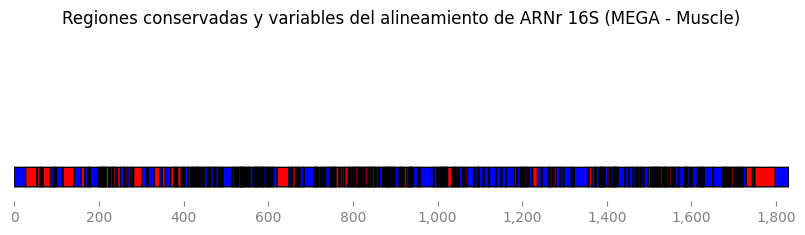

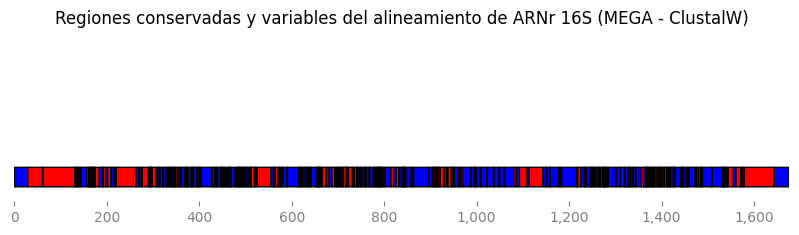

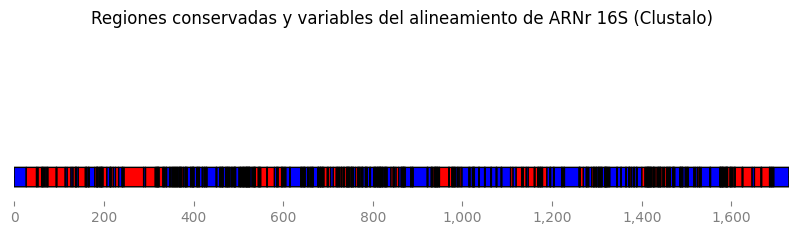

In [5]:
import matplotlib.pyplot as plt
from dna_features_viewer import GraphicFeature, GraphicRecord
from collections import Counter
from Bio import AlignIO

# Cargar el alineamiento desde un archivo FASTA o CLustal
alignment_MEGA_MUSCLE = AlignIO.read("/content/Bacterias  + Sneathia (limpiado) - Ribosomal rRNA 16S - MUSCLE.fas", "fasta")
alignment_MEGA_ClustalW = AlignIO.read("/content/Bacterias  + Sneathia (limpiado) - Ribosomal rRNA 16S - Clustal.fas", "fasta")
alignment_Clustalo = AlignIO.read("/content/clustalo-ARNr 16S - Bacterias + Sneathia (limpio) -p1m.aln-clustal_num", "clustal")

# Determinar la longitud del alineamiento (ahora será end_position - start_position)
alignment_length_1 = alignment_MEGA_MUSCLE.get_alignment_length()
alignment_length_2 = alignment_MEGA_ClustalW.get_alignment_length()
alignment_length_3 = alignment_Clustalo.get_alignment_length()

# Función para calcular la conservación en una posición
def calculate_conservation(alignment, alignment_length, threshold):
    conserved_regions = []
    variable_regions = []
    for pos in range(alignment_length):
        column = [seq[pos] for seq in alignment]  # Extraer bases de la columna
        counts = Counter(column)
        most_common_base, freq = counts.most_common(1)[0]
        conservation_ratio = freq / len(column)
        # Clasificar como conservado o variable
        if conservation_ratio >= threshold:
            conserved_regions.append(pos)
        else:
            variable_regions.append(pos)
    return conserved_regions, variable_regions

# Obtener regiones conservadas y variables
conserved_positions_MEGA_Muscle, variable_position_MEGA_Muscle = calculate_conservation(alignment_MEGA_MUSCLE, alignment_length_1, 0.85)
conserved_positions_MEGA_ClustalW, variable_position_MEGA_ClustalW = calculate_conservation(alignment_MEGA_ClustalW, alignment_length_2, 0.85)
conserved_positions_Clustalo, variable_position_Clustalo = calculate_conservation(alignment_Clustalo, alignment_length_3, 0.85)

# Convertir posiciones en características gráficas
def positions_to_features(positions, color, label):
    features = []
    start = positions[0]
    for i in range(1, len(positions)):
        if positions[i] != positions[i-1] + 1:
            # Crear una región cuando la continuidad se rompe
            features.append(GraphicFeature(start=start, end=positions[i-1]+1, color=color, label=label))
            start = positions[i]
    # Añadir la última región
    features.append(GraphicFeature(start=start, end=positions[-1]+1, color=color, label=label))
    return features

# Crear las características gráficas
conserved_features_MEGA_Muscle = positions_to_features(conserved_positions_MEGA_Muscle, color="blue",  label = None)
variable_features_MEGA_Muscle = positions_to_features(variable_position_MEGA_Muscle, color="red",   label = None)
conserved_features_MEGA_ClustalW = positions_to_features(conserved_positions_MEGA_ClustalW, color="blue",  label = None)
variable_features_MEGA_ClustalW = positions_to_features(variable_position_MEGA_ClustalW, color="red",   label = None)
conserved_features_Clustalo = positions_to_features(conserved_positions_Clustalo, color="blue",  label = None)
variable_features_Clustalo = positions_to_features(variable_position_Clustalo, color="red",   label = None)

# Crear el GraphicRecord y graficarlo
record = GraphicRecord(sequence_length=alignment_length_1, features=conserved_features_MEGA_Muscle + variable_features_MEGA_Muscle)
record.plot(figure_width=10)
plt.title("Regiones conservadas y variables del alineamiento de ARNr 16S (MEGA - Muscle)")
plt.show()

record_2 = GraphicRecord(sequence_length=alignment_length_2, features=conserved_features_MEGA_ClustalW + variable_features_MEGA_ClustalW)
record_2.plot(figure_width=10)
plt.title("Regiones conservadas y variables del alineamiento de ARNr 16S (MEGA - ClustalW)")
plt.show()

record_3 = GraphicRecord(sequence_length=alignment_length_3, features=conserved_features_Clustalo + variable_features_Clustalo)
record_3.plot(figure_width=10)
plt.title("Regiones conservadas y variables del alineamiento de ARNr 16S (Clustalo)")
plt.show()

/usr/local/lib/python3.11/dist-packages/Bio/Align/AlignInfo.py:62: BiopythonDeprecationWarning: The `dumb_consensus` method is deprecated and will be removed in a future release of Biopython. As an alternative, you can convert the multiple sequence alignment object to a new-style Alignment object by via its `.alignment` property, and then create a Motif object. You can then use the `.consensus` or `.degenerate_consensus` property of the Motif object to get a consensus sequence. For more control over how the consensus sequence is calculated, you can call the `calculate_consensus` method on the `.counts` property of the Motif object. This is an example for a multiple sequence alignment `msa` of DNA nucleotides:
>>> from Bio.Seq import Seq
>>> from Bio.SeqRecord import SeqRecord
>>> from Bio.Align import MultipleSeqAlignment
>>> from Bio.Align.AlignInfo import SummaryInfo
>>> msa = MultipleSeqAlignment([SeqRecord(Seq('ACGT')),
...                             SeqRecord(Seq('ATGT')),
...   

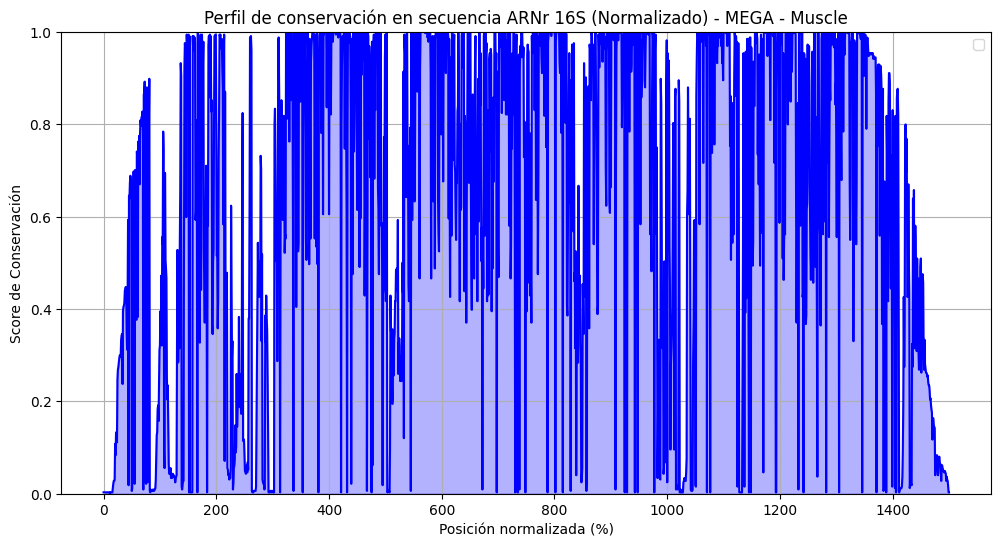

<ipython-input-6-cb12d4cb47d5>:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


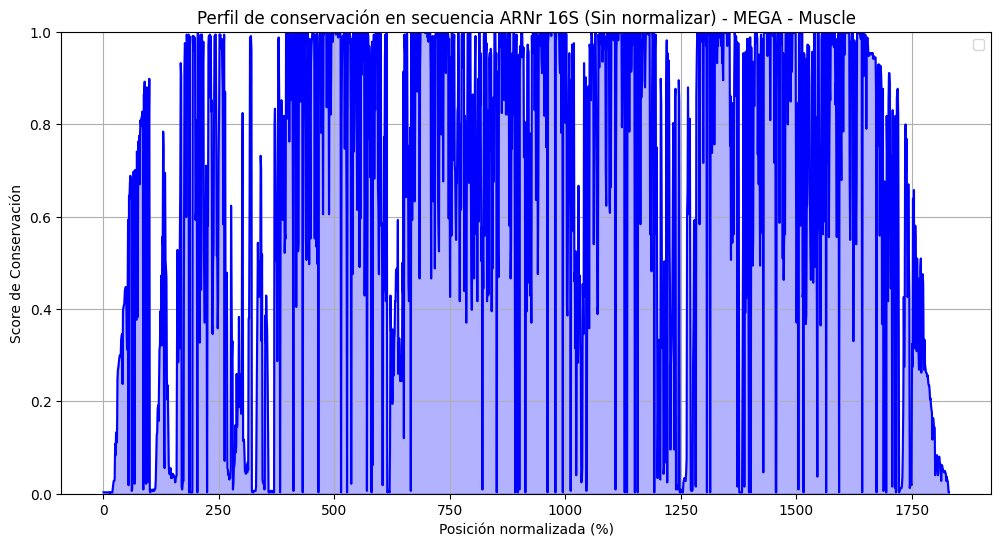

<ipython-input-6-cb12d4cb47d5>:98: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


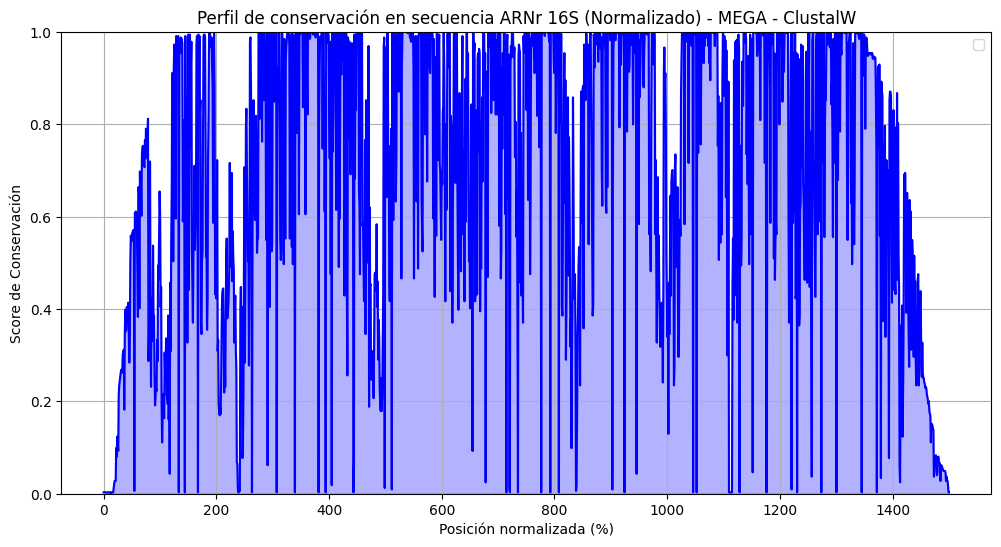

<ipython-input-6-cb12d4cb47d5>:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


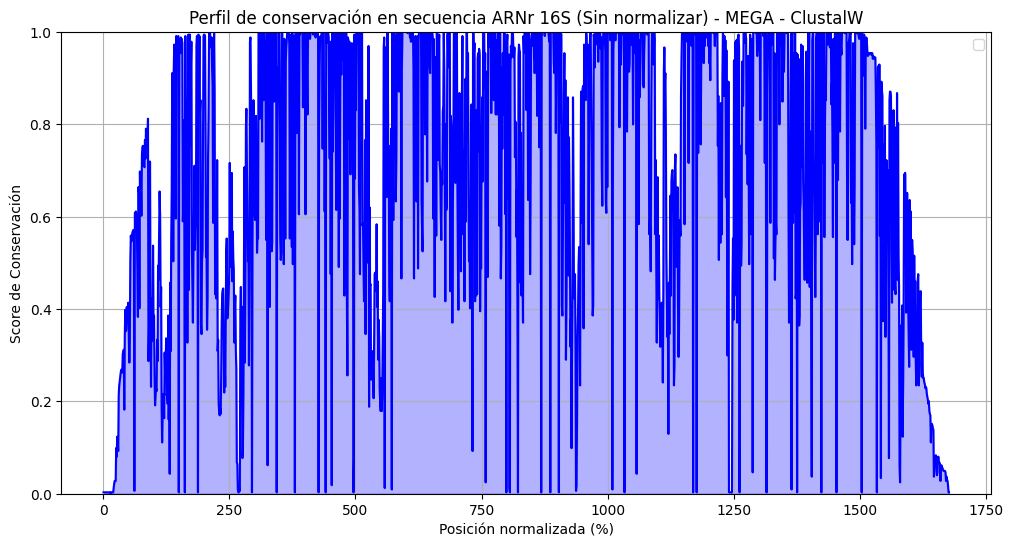

<ipython-input-6-cb12d4cb47d5>:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


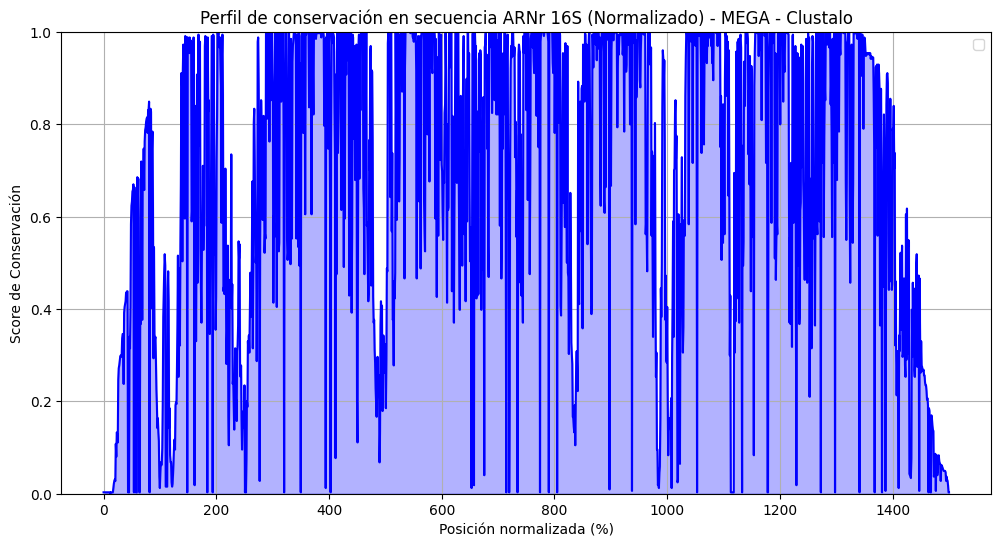

<ipython-input-6-cb12d4cb47d5>:131: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


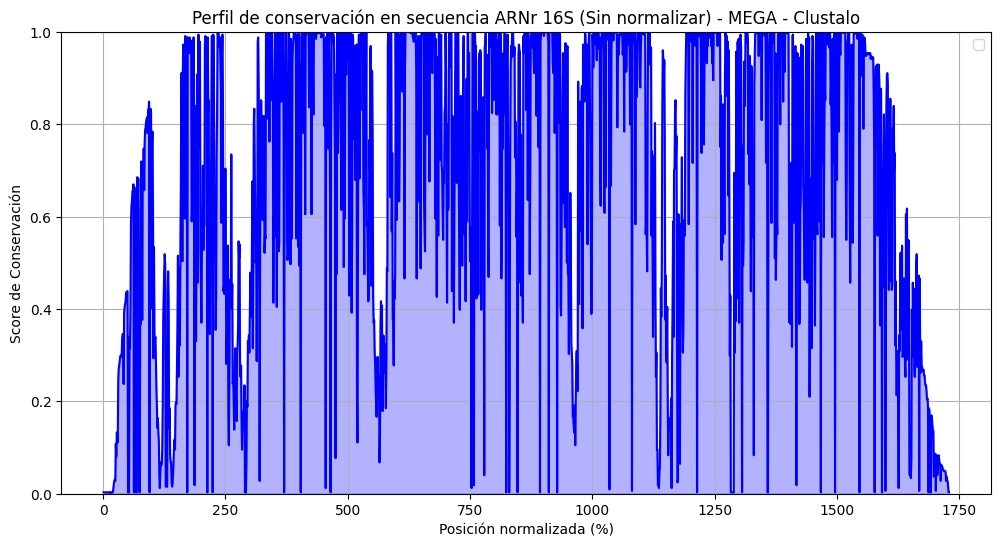

In [6]:
from Bio import AlignIO
from Bio.Align import AlignInfo
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cargar el alineamiento desde un archivo FASTA o CLustal
alignment_MEGA_MUSCLE = AlignIO.read("/content/Bacterias  + Sneathia (limpiado) - Ribosomal rRNA 16S - MUSCLE.fas", "fasta")
alignment_MEGA_ClustalW = AlignIO.read("/content/Bacterias  + Sneathia (limpiado) - Ribosomal rRNA 16S - Clustal.fas", "fasta")
alignment_Clustalo = AlignIO.read("/content/clustalo-ARNr 16S - Bacterias + Sneathia (limpio) -p1m.aln-clustal_num", "clustal")

# Calcular el resumen del alineamiento
summary_align_MEGA_Muscle = AlignInfo.SummaryInfo(alignment_MEGA_MUSCLE)
summary_align_MEGA_ClustalW = AlignInfo.SummaryInfo(alignment_MEGA_ClustalW)
summary_align_Clustalo = AlignInfo.SummaryInfo(alignment_Clustalo)

# Crear un perfil de conservación basado en frecuencias de las bases
consensus_MEGA_Muscle = summary_align_MEGA_Muscle.dumb_consensus(threshold=0.975, ambiguous='N')
consensus_MEGA_ClustalW = summary_align_MEGA_ClustalW.dumb_consensus(threshold=0.975, ambiguous='N')
consensus_Clustalo = summary_align_Clustalo.dumb_consensus(threshold=0.975, ambiguous='N')

# Definir nucleótidos válidos
valid_nucleotides = set('ACGT')

# Calcular puntajes de conservación por columna
conservation_scores_MEGA_Muscle = []
for i in range(alignment_MEGA_MUSCLE.get_alignment_length()):
    column = [seq[i] for seq in alignment_MEGA_MUSCLE]
    filtered_column = [base for base in column if base in valid_nucleotides]
    if filtered_column:
        freq = max(filtered_column.count(base) for base in set(filtered_column)) / len(column)
    else:
        freq = 0
    conservation_scores_MEGA_Muscle.append(freq)

conservation_scores_MEGA_ClustalW = []
for i in range(alignment_MEGA_ClustalW.get_alignment_length()):
    column = [seq[i] for seq in alignment_MEGA_ClustalW]
    filtered_column = [base for base in column if base in valid_nucleotides]
    if filtered_column:
        freq = max(filtered_column.count(base) for base in set(filtered_column)) / len(column)
    else:
        freq = 0
    conservation_scores_MEGA_ClustalW.append(freq)

conservation_scores_Clustalo = []
for i in range(alignment_Clustalo.get_alignment_length()):
    column = [seq[i] for seq in alignment_Clustalo]
    filtered_column = [base for base in column if base in valid_nucleotides]
    if filtered_column:
        freq = max(filtered_column.count(base) for base in set(filtered_column)) / len(column)
    else:
        freq = 0
    conservation_scores_Clustalo.append(freq)


# Normalizar la longitud al eje de 0 a 100
normalized_x_MEGA_Muscle = np.linspace(0, 1500, num=len(conservation_scores_MEGA_Muscle))
normalized_x_MEGA_ClustalW = np.linspace(0, 1500, num=len(conservation_scores_MEGA_ClustalW))
normalized_x_Clustalo = np.linspace(0, 1500, num=len(conservation_scores_Clustalo))

# Eje no normalizado basado en la longitud real del alineamiento
real_x_MEGA_Muscle = np.arange(1, alignment_MEGA_MUSCLE.get_alignment_length() + 1)
real_x_MEGA_ClustalW = np.arange(1, alignment_MEGA_ClustalW.get_alignment_length() + 1)
real_x_Clustalo = np.arange(1, alignment_Clustalo.get_alignment_length() + 1)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(normalized_x_MEGA_Muscle, conservation_scores_MEGA_Muscle, label=None, color='blue')
plt.fill_between(normalized_x_MEGA_Muscle, conservation_scores_MEGA_Muscle, color='blue', alpha=0.3)
plt.title('Perfil de conservación en secuencia ARNr 16S (Normalizado) - MEGA - Muscle')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Conservación')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(real_x_MEGA_Muscle, conservation_scores_MEGA_Muscle, label=None, color='blue')
plt.fill_between(real_x_MEGA_Muscle, conservation_scores_MEGA_Muscle, color='blue', alpha=0.3)
plt.title('Perfil de conservación en secuencia ARNr 16S (Sin normalizar) - MEGA - Muscle')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Conservación')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(normalized_x_MEGA_ClustalW, conservation_scores_MEGA_ClustalW, label=None, color='blue')
plt.fill_between(normalized_x_MEGA_ClustalW, conservation_scores_MEGA_ClustalW, color='blue', alpha=0.3)
plt.title('Perfil de conservación en secuencia ARNr 16S (Normalizado) - MEGA - ClustalW')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Conservación')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(real_x_MEGA_ClustalW, conservation_scores_MEGA_ClustalW, label=None, color='blue')
plt.fill_between(real_x_MEGA_ClustalW, conservation_scores_MEGA_ClustalW, color='blue', alpha=0.3)
plt.title('Perfil de conservación en secuencia ARNr 16S (Sin normalizar) - MEGA - ClustalW')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Conservación')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(normalized_x_Clustalo, conservation_scores_Clustalo, label=None, color='blue')
plt.fill_between(normalized_x_Clustalo, conservation_scores_Clustalo, color='blue', alpha=0.3)
plt.title('Perfil de conservación en secuencia ARNr 16S (Normalizado) - MEGA - Clustalo')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Conservación')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(real_x_Clustalo, conservation_scores_Clustalo, label=None, color='blue')
plt.fill_between(real_x_Clustalo, conservation_scores_Clustalo, color='blue', alpha=0.3)
plt.title('Perfil de conservación en secuencia ARNr 16S (Sin normalizar) - MEGA - Clustalo')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Conservación')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-9-dea27b871f86>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


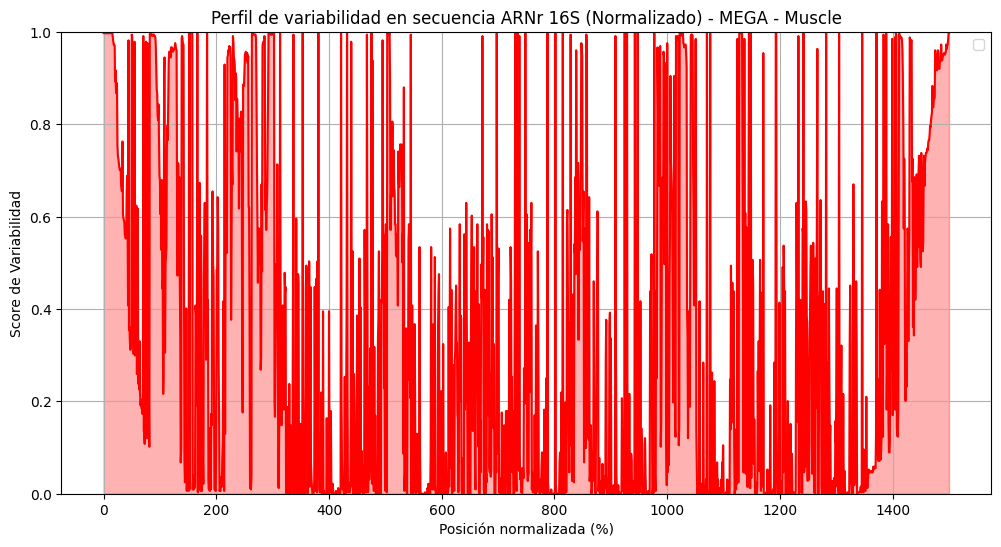

<ipython-input-9-dea27b871f86>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


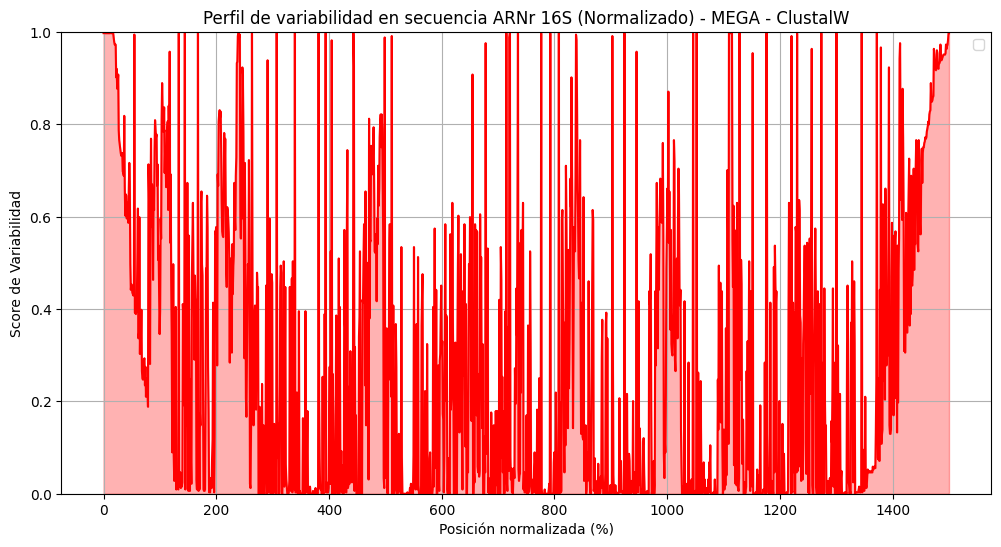

<ipython-input-9-dea27b871f86>:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


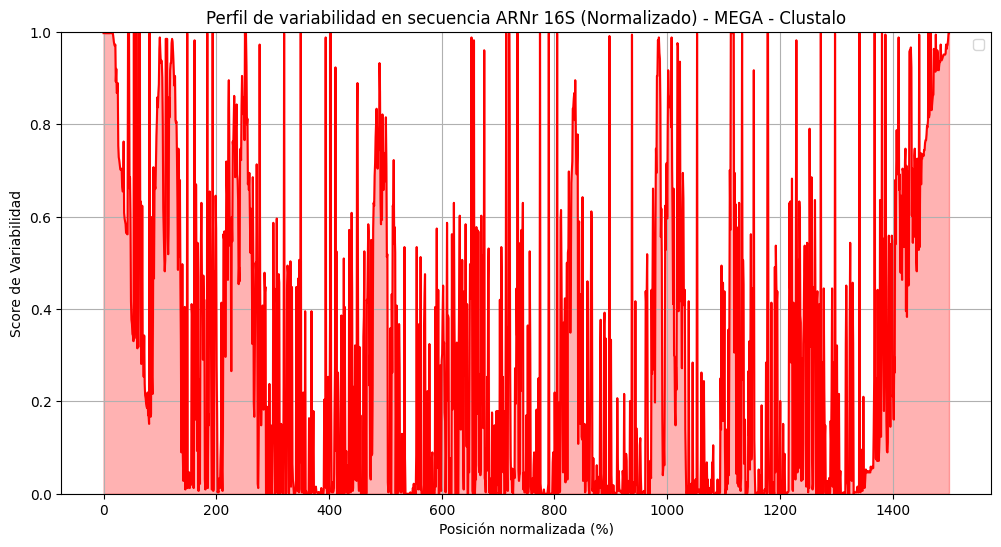

<ipython-input-9-dea27b871f86>:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


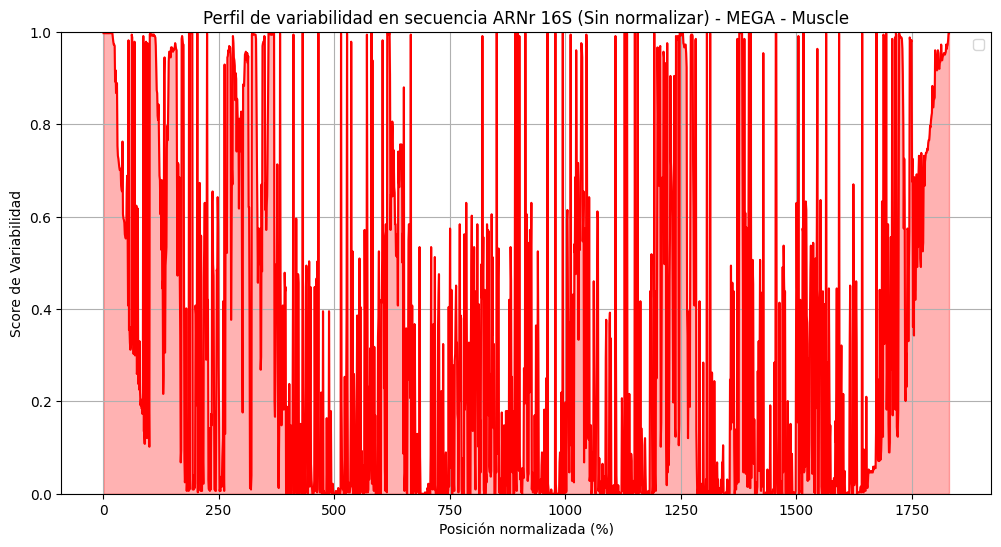

<ipython-input-9-dea27b871f86>:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


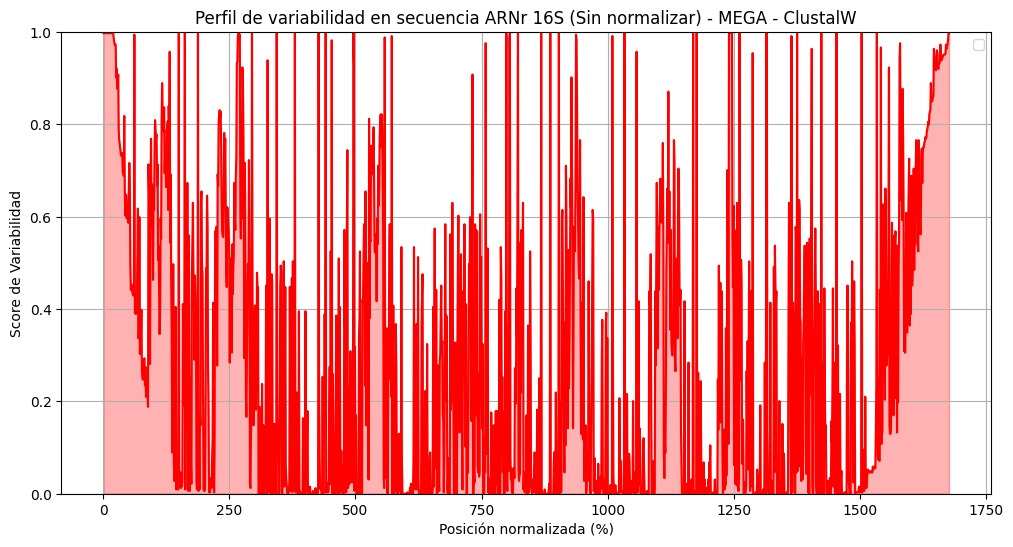

<ipython-input-9-dea27b871f86>:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


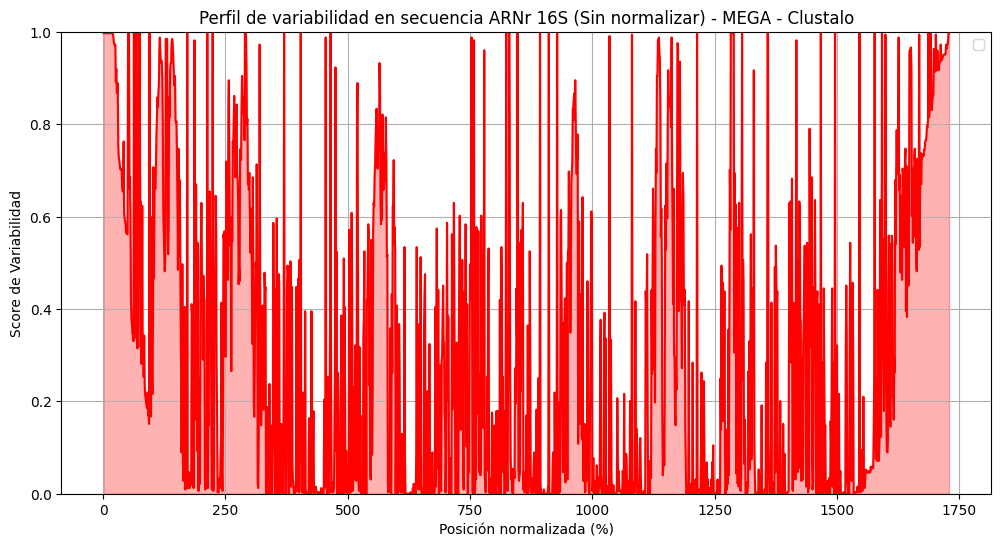

In [9]:
# Calcular las regiones variables
variable_scores_MEGA_Muscle = [1 - score for score in conservation_scores_MEGA_Muscle]
variable_scores_MEGA_ClustalW = [1 - score for score in conservation_scores_MEGA_ClustalW]
variable_scores_Clustalo = [1 - score for score in conservation_scores_Clustalo]

# Graficar el perfil de variabilidad
plt.figure(figsize=(12, 6))
plt.plot(normalized_x_MEGA_Muscle, variable_scores_MEGA_Muscle, label= None, color='red')
plt.fill_between(normalized_x_MEGA_Muscle, variable_scores_MEGA_Muscle, color='red', alpha=0.3)
plt.title('Perfil de variabilidad en secuencia ARNr 16S (Normalizado) - MEGA - Muscle')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Variabilidad')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(normalized_x_MEGA_ClustalW, variable_scores_MEGA_ClustalW, label= None, color='red')
plt.fill_between(normalized_x_MEGA_ClustalW, variable_scores_MEGA_ClustalW, color='red', alpha=0.3)
plt.title('Perfil de variabilidad en secuencia ARNr 16S (Normalizado) - MEGA - ClustalW')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Variabilidad')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(normalized_x_Clustalo, variable_scores_Clustalo, label= None, color='red')
plt.fill_between(normalized_x_Clustalo, variable_scores_Clustalo, color='red', alpha=0.3)
plt.title('Perfil de variabilidad en secuencia ARNr 16S (Normalizado) - MEGA - Clustalo')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Variabilidad')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

# Graficar el perfil de variabilidad (no normalizado)
plt.figure(figsize=(12, 6))
plt.plot(real_x_MEGA_Muscle, variable_scores_MEGA_Muscle, label= None, color='red')
plt.fill_between(real_x_MEGA_Muscle, variable_scores_MEGA_Muscle, color='red', alpha=0.3)
plt.title('Perfil de variabilidad en secuencia ARNr 16S (Sin normalizar) - MEGA - Muscle')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Variabilidad')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(real_x_MEGA_ClustalW, variable_scores_MEGA_ClustalW, label= None, color='red')
plt.fill_between(real_x_MEGA_ClustalW, variable_scores_MEGA_ClustalW, color='red', alpha=0.3)
plt.title('Perfil de variabilidad en secuencia ARNr 16S (Sin normalizar) - MEGA - ClustalW')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Variabilidad')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(real_x_Clustalo, variable_scores_Clustalo, label= None, color='red')
plt.fill_between(real_x_Clustalo, variable_scores_Clustalo, color='red', alpha=0.3)
plt.title('Perfil de variabilidad en secuencia ARNr 16S (Sin normalizar) - MEGA - Clustalo')
plt.xlabel('Posición normalizada (%)')
plt.ylabel('Score de Variabilidad')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

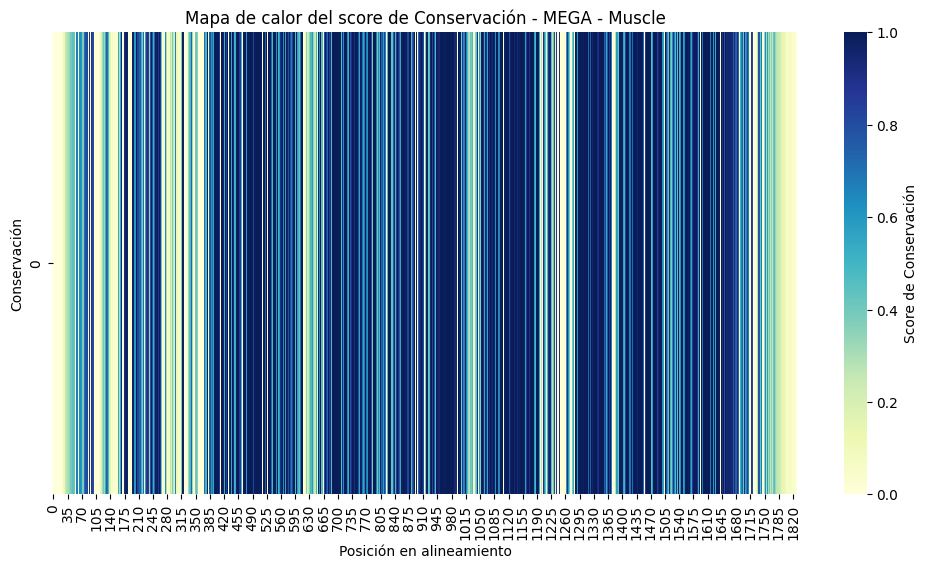

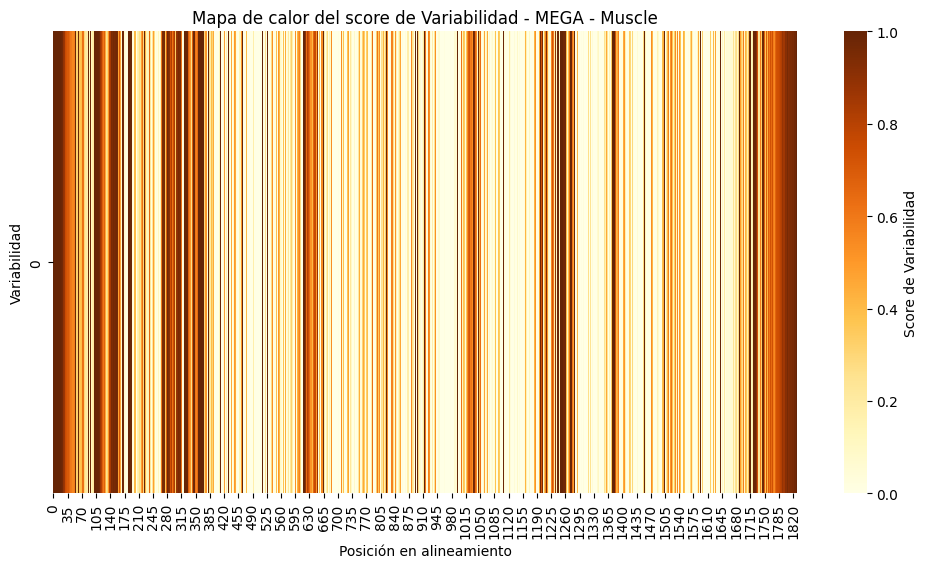

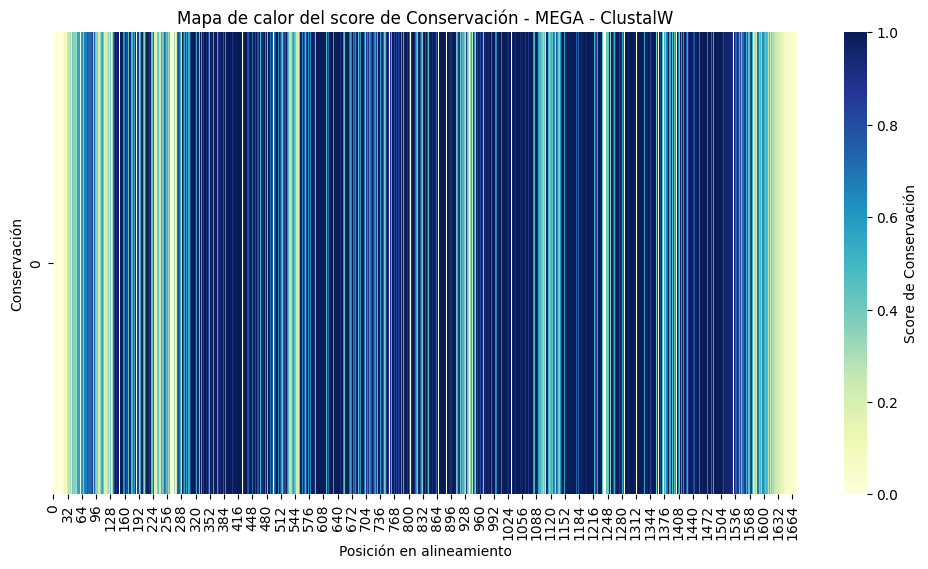

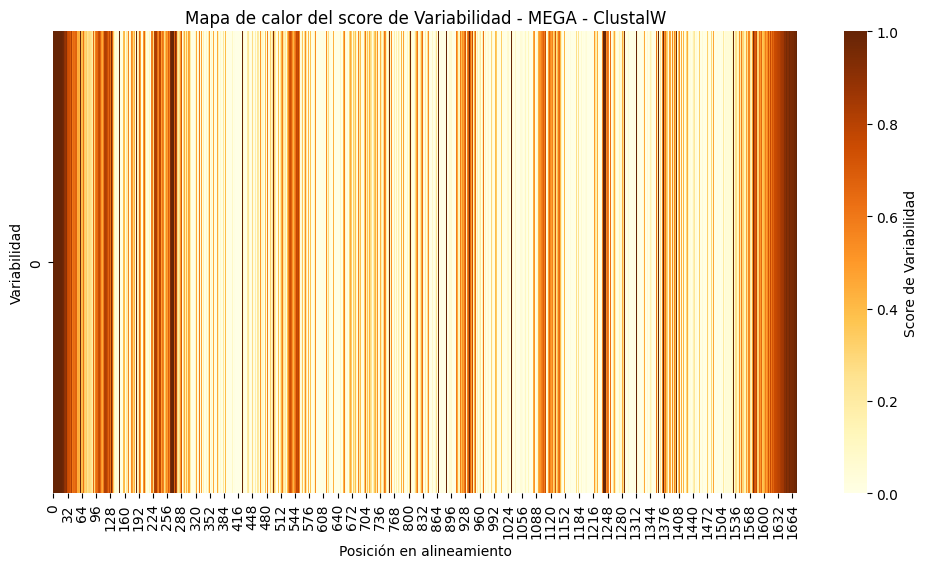

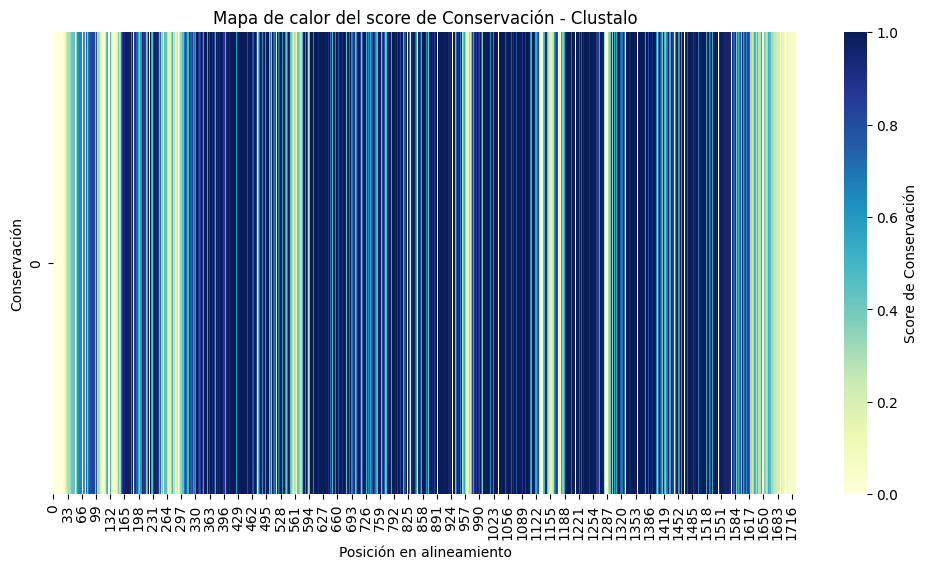

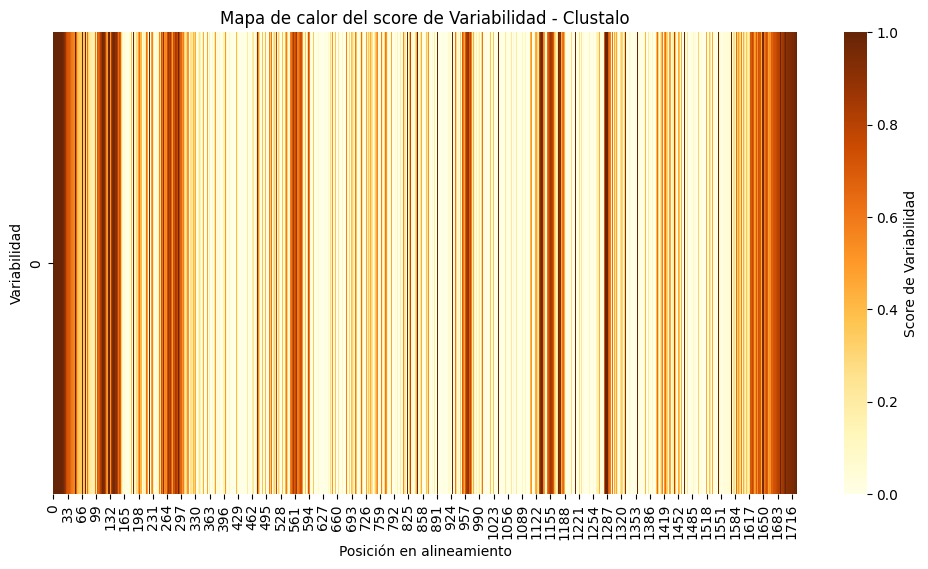

In [10]:
# Heatmap de conservación
plt.figure(figsize=(12, 6))
sns.heatmap([conservation_scores_MEGA_Muscle], cmap="YlGnBu", cbar_kws={'label': 'Score de Conservación'})
plt.title('Mapa de calor del score de Conservación - MEGA - Muscle')
plt.xlabel('Posición en alineamiento')
plt.ylabel('Conservación')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap([variable_scores_MEGA_Muscle], cmap="YlOrBr", cbar_kws={'label': 'Score de Variabilidad'})
plt.title('Mapa de calor del score de Variabilidad - MEGA - Muscle')
plt.xlabel('Posición en alineamiento')
plt.ylabel('Variabilidad')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap([conservation_scores_MEGA_ClustalW], cmap="YlGnBu", cbar_kws={'label': 'Score de Conservación'})
plt.title('Mapa de calor del score de Conservación - MEGA - ClustalW')
plt.xlabel('Posición en alineamiento')
plt.ylabel('Conservación')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap([variable_scores_MEGA_ClustalW], cmap="YlOrBr", cbar_kws={'label': 'Score de Variabilidad'})
plt.title('Mapa de calor del score de Variabilidad - MEGA - ClustalW')
plt.xlabel('Posición en alineamiento')
plt.ylabel('Variabilidad')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap([conservation_scores_Clustalo], cmap="YlGnBu", cbar_kws={'label': 'Score de Conservación'})
plt.title('Mapa de calor del score de Conservación - Clustalo')
plt.xlabel('Posición en alineamiento')
plt.ylabel('Conservación')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap([variable_scores_Clustalo], cmap="YlOrBr", cbar_kws={'label': 'Score de Variabilidad'})
plt.title('Mapa de calor del score de Variabilidad - Clustalo')
plt.xlabel('Posición en alineamiento')
plt.ylabel('Variabilidad')
plt.show()